In [1]:
import torch
import numpy as np
import gymnasium as gym

import sys
sys.path.append('../')
from tools.trainer import Trainer
from tools.logger import Logger
from environments.hockey_wrapper import HockeyWrapper
from TD3 import TD3Agent
import laserhockey.hockey_env as h_env

In [2]:
env_string = "LunarLanderContinuous-v2"

In [3]:
if env_string == "Hockey":
    env = HockeyWrapper(mode="normal", opponent="mixed", add_opponents=False)
else:
    env = gym.make(env_string)

In [4]:
agent = TD3Agent(env.observation_space, env.action_space)
trainer = Trainer()

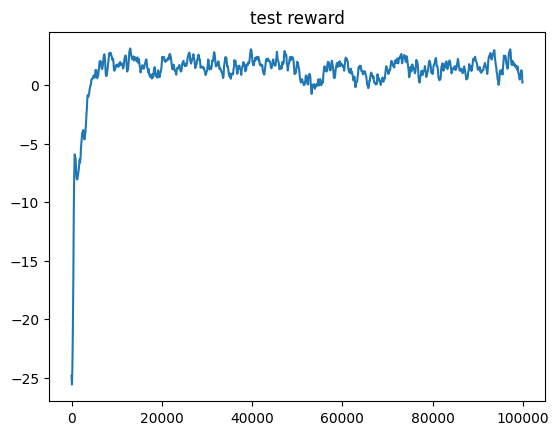

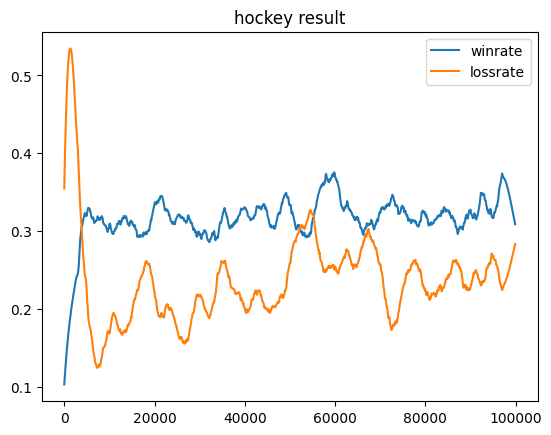

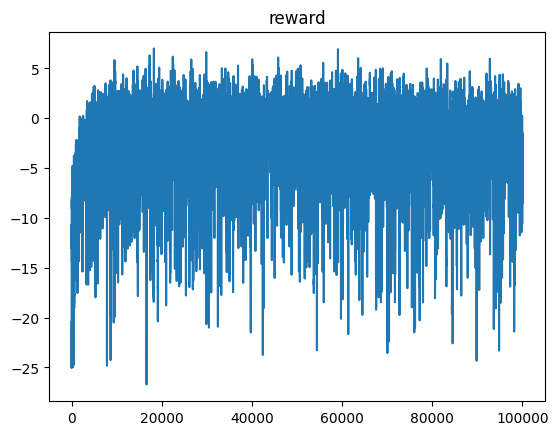

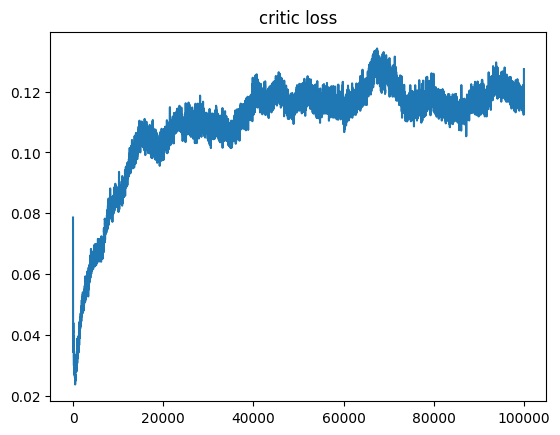

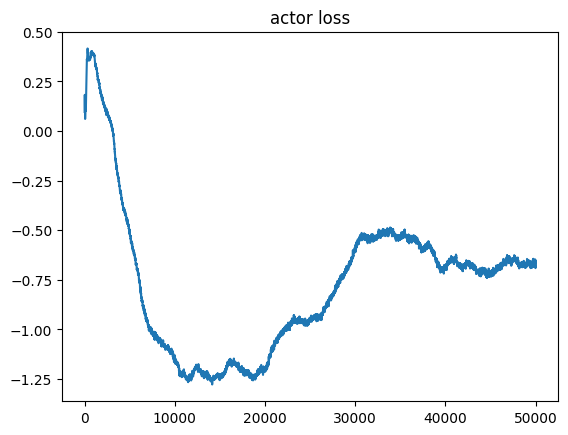

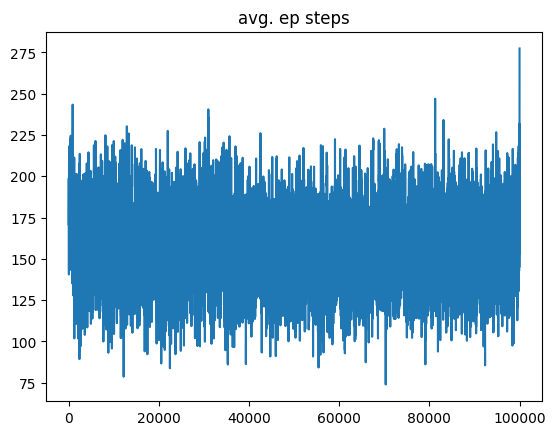

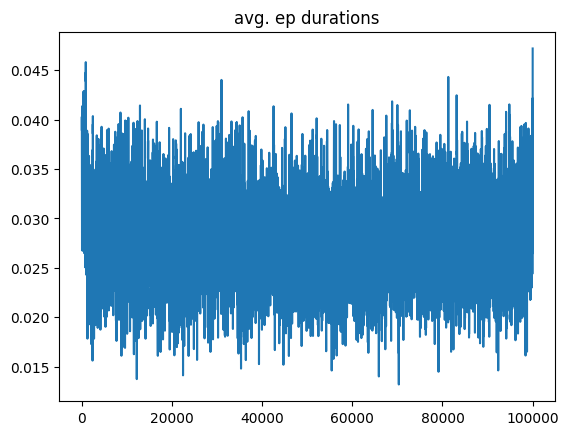

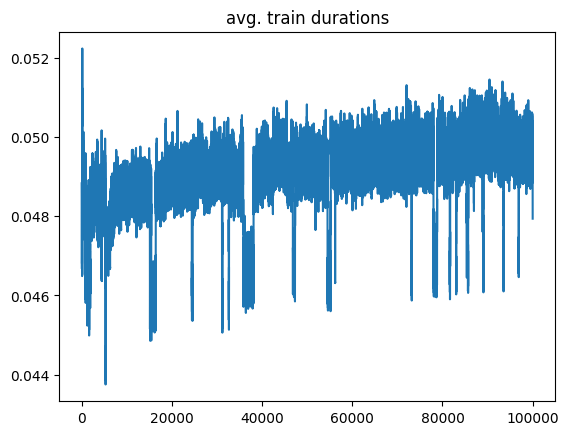

In [15]:
logger = Logger(10000, 100)
logger.hockey = True
logger.load('logs/hockey_strong_mixed_new.npy')
logger.plot()

In [6]:
# player = h_env.BasicOpponent(weak=False)
player = agent

In [7]:
# state = torch.load("checkpoint_hockey_add_long.pth")
# agent.restore_state(state)
# logger = Logger(30000, 100)
# logger.load("logs/hockey_strong.npy")
# trainer.logger = logger

In [8]:
ep_rewards = trainer.train(env, agent, n_episodes=10000, test_every=100, noise=0.4, player=player, mixed=True)

/home/gekeleda/mambaforge/envs/rl/lib/python3.8/site-packages/gymnasium/core.py:297: UserWarning: WARN: env.ishockey to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.ishockey` for environment variables or `env.get_attr('ishockey')` that will search the reminding wrappers.
  logger.warn(
/home/gekeleda/mambaforge/envs/rl/lib/python3.8/site-packages/gymnasium/core.py:297: UserWarning: WARN: env.add_opponents to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.add_opponents` for environment variables or `env.get_attr('add_opponents')` that will search the reminding wrappers.
  logger.warn(


Step 100/10000:
                    test reward: -125.38
                    mean reward: -631.46, max reward: -89.93
                    Avg. step count: 85.0, Avg ep duration: 0.013s
                    Avg. critic loss: 3.47, Avg. actor loss: 7.89
                    Avg. train duration: 0.067s
                    
            
Step 200/10000:
                    test reward: 8.04
                    mean reward: -314.48, max reward: 133.71
                    Avg. step count: 165.2, Avg ep duration: 0.024s
                    Avg. critic loss: 2.15, Avg. actor loss: 8.54
                    Avg. train duration: 0.070s
                    
            
Step 300/10000:
                    test reward: -15.79
                    mean reward: -214.94, max reward: 70.48
                    Avg. step count: 198.7, Avg ep duration: 0.027s
                    Avg. critic loss: 1.69, Avg. actor loss: 8.13
                    Avg. train duration: 0.068s
                    
            
Step

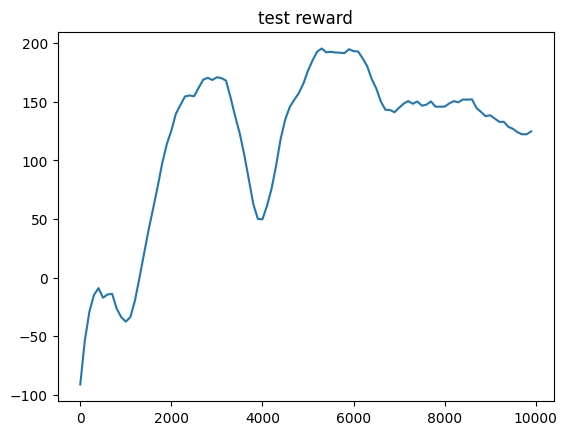

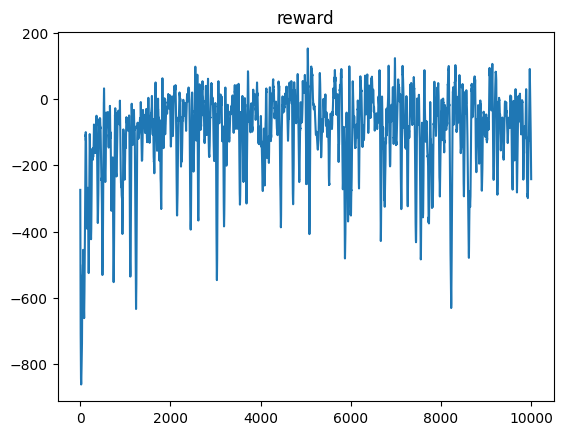

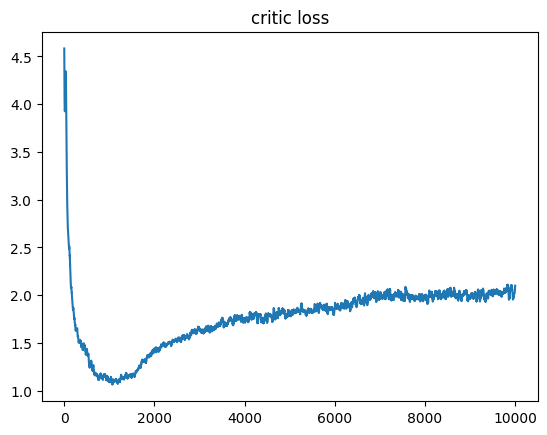

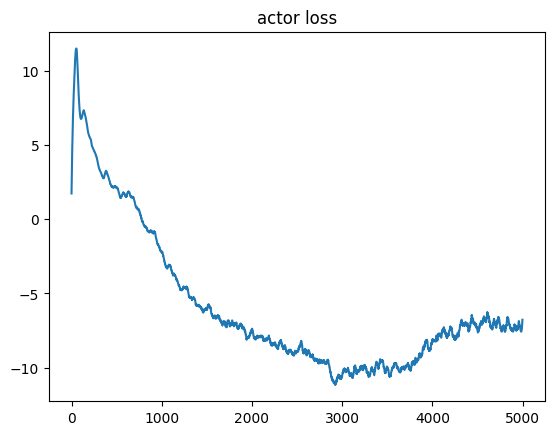

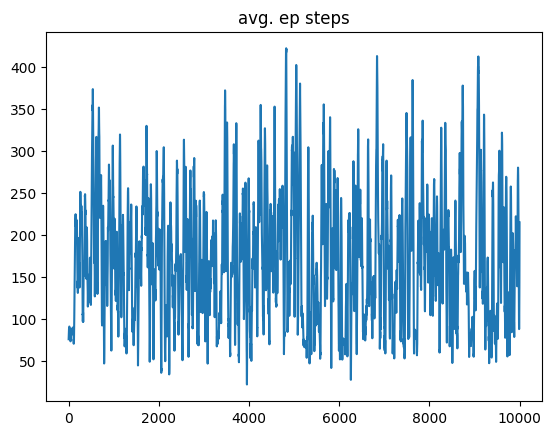

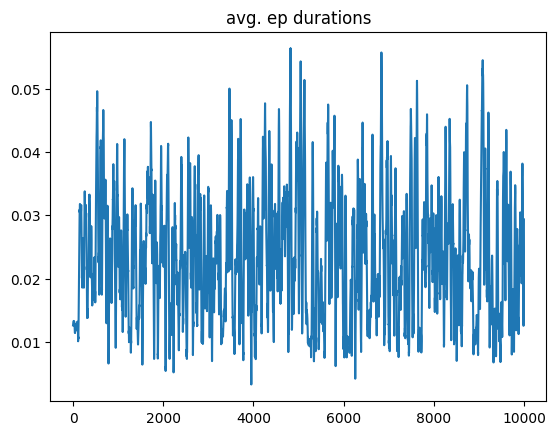

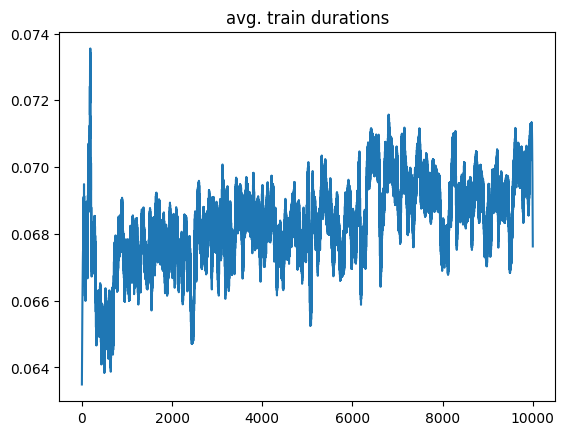

In [9]:
trainer.logger.plot()

In [10]:
def play(env_string, agent, n_episodes=10, noise=0, opponent='strong', render=None):
    if env_string == 'Hockey':
        env = HockeyWrapper(mode='normal', opponent=opponent)
        if render is None:
            render = True
    else:
        env = gym.make(env_string, render_mode='human')
        render = False
    # player = h_env.BasicOpponent(weak=False)
    player = agent
    steps, rewards, observations, actions, results = Trainer.run(env, player, n_episodes=n_episodes, noise=noise, render=render, store_transitions=False, hockey=env_string=='Hockey')
    env.close()
    return steps, rewards, observations, actions, results

In [11]:
test_opp = h_env.BasicOpponent(weak=False)
# test_opp = env.opponent_list[3]

In [12]:
steps, rewards, observations, actions, results = play(env_string, agent, n_episodes=2, noise=0, render=True, opponent=test_opp)
print(np.mean(rewards))
# print(np.mean(results==1), np.mean(results==0), np.mean(results==-1))

198.99187549833877


In [13]:
# steps, rewards, observations, actions, results = play(env_string, agent, n_episodes=100, noise=0, render=False, opponent=test_opp)
# print(np.mean(rewards))
# # print(np.mean(results==1), np.mean(results==0), np.mean(results==-1))

In [14]:
trainer.logger.save("logs/lunar_an_0.002.npy")

In [15]:
torch.save(agent.state(), 'checkpoint_lunar_an_0.002.pth')

In [16]:
# agent_state = torch.load('checkpoint_hockey.pth')
# agent.restore_state(agent_state)